In [1]:
### Use gpd environment (a clean environment for geopandas)

In [1]:
#import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import numpy as np
import pylab as pl
import os
from IPython import display
from subprocess import call
from datetime import datetime
import subprocess
import sys
sys.path.append('/Users/vsriniv/Documents/Research/Github/PatchSim')
sys.path.append('/Users/brylew/NSSACgit/PatchSim')
import patchsim as sim
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# ## Note that the v2 OD_Matrix has both src-dest and dest-src travel times.
# od_matrix = pd.read_csv('../data/pop_travel/OD_Matrix_v2.csv')
# od_matrix['Grav'] = (od_matrix.Origin_Pop*od_matrix.Destination_Pop)/(od_matrix.Travel_Time**2)
# od_matrix = od_matrix.assign(norm_flow=od_matrix.Grav.div(od_matrix.groupby(['Origin']).Grav.transform('sum')))
# od_matrix = od_matrix[['Origin','Destination','norm_flow']]

# hz = od_matrix.Origin.unique()
# non_commute=0.7
# df = pd.DataFrame({'Origin':hz,'Destination':hz,'norm_flow':np.repeat(non_commute,len(hz))})
# od_matrix.norm_flow = od_matrix.norm_flow*(1-non_commute)
# od_matrix = od_matrix.append(df[['Origin','Destination','norm_flow']])
# od_matrix['temp'] = 0
# od_matrix.Origin = od_matrix.Origin.str.replace(' ','_')
# od_matrix.Destination = od_matrix.Destination.str.replace(' ','_')
# od_matrix[['Origin','Destination','temp','norm_flow']].to_csv('../data/patchsim/grav_drc_v2.csv',sep=' ',index=None,header=None)

In [4]:
# df = pd.read_csv('../data/pop_travel/OD_Matrix_v2.csv')
# df = df[['Origin','Origin_Pop']].drop_duplicates()
# df.Origin = df.Origin.str.replace(' ','_')
# df.to_csv('../data/patchsim/pop_drc_v2.csv',sep=' ',index=None,header=None)

In [21]:
cfg1 = sim.read_config('../data/patchsim/cfg_stage1.txt')
sim.run_disease_simulation(cfg1,write_epi=True)
cfg2 = sim.read_config('../data/patchsim/cfg_stage2.txt')
sim.run_disease_simulation(cfg2,write_epi=True)

In [22]:
out1_df = pd.read_csv('../outputs/sample1.out',delimiter=' ',header=None,index_col=0)
out2_df = pd.read_csv('../outputs/sample2.out',delimiter=' ',header=None,index_col=0)
out2_df.columns = [x+len(out1_df.columns) for x in out2_df.columns]
out_df = out1_df.join(out2_df)

In [23]:
out_df.index = out_df.index.str.replace('_',' ')
out_wk = out_df.groupby((out_df.columns - 1)// 7, axis=1).sum()
wk_range = out_wk.columns[:-1]
out_wk = out_wk[wk_range]
out_wk.index = out_wk.index.str.replace('_',' ')
out_wk.sum().cumsum()

0      26
1      33
2      60
3      68
4      75
5      84
6      98
7     112
8     126
9     140
10    160
11    181
12    202
13    221
14    242
15    264
16    304
17    371
18    476
19    632
dtype: int64

In [19]:
# gdf = gpd.read_file('../data/shapefile/healthzones_v2/DRC_Districts.shp').set_index('ADM2_NAME')
# gdf = gdf.join(out_wk)
# count=0
# for wk in wk_range:
#     f = plt.figure(figsize=(10,10))
#     ax = plt.gca()
#     plt.axis('off')
#     plt.title('Simulated cases in week {}'.format(wk),fontsize=20)
#     gdf[(gdf.ADM1_NAME.isin(['ITURI','NORD KIVU']))].plot(ax=ax,column=wk,cmap='Reds',vmin=0,vmax=10,legend=True)
#     #gdf.plot(ax=ax,column=wk,cmap='Reds',vmin=0,vmax=10,legend=True)
#     display.clear_output(wait=True)
#     display.display(pl.gcf())    
#     plt.savefig('../plots/{:02d}.png'.format(count),bbox_inches='tight')
#     count+=1
#     plt.close()
# call("convert -delay 100 -loop 1 ../plots/*.png ../plots/sim_anim_nk.gif".split(' '))
# [os.remove('../plots/'+x) for x in os.listdir('../plots') if '.png' in x];

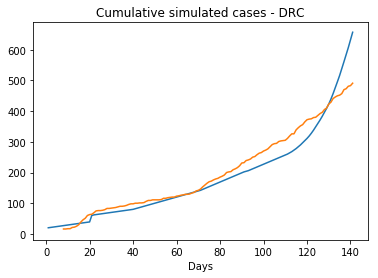

In [24]:
evd_df = pd.read_csv('../data/ebola_drc_nordkivu/data/ebola_drc-all.csv')
#evd_df = pd.read_csv('../data/ebola_drc_nordkivu/data/ebola_drc-all.csv')
evd_df['Date'] = evd_df.date.apply(lambda x: datetime.strptime(str(x),'%Y%m%d'))
ax = out_df.sum().cumsum().plot()
gt = evd_df[evd_df.health_zone=='all'].total_c.values
ax.plot(gt)
plt.title('Cumulative simulated cases - DRC')
plt.xlabel('Days')
plt.savefig('../plots/sim_epicurve.png',dpi=100)

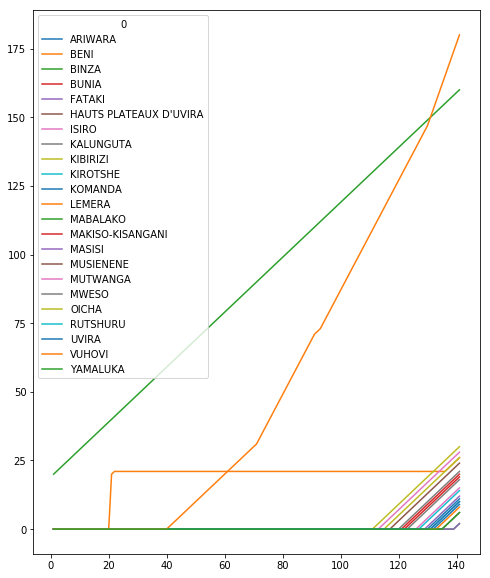

In [28]:
out_df.cumsum(axis=1)[out_df.cumsum(axis=1)[141]>0].T.plot(figsize=[8,10])

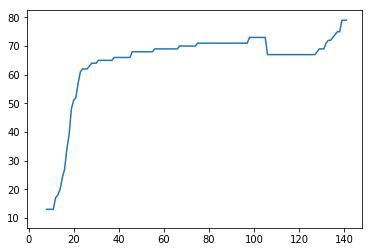

In [20]:
plt.plot(evd_df[evd_df.health_zone=='Mabalako'].total_c.values)

In [ ]:
evd_df[evd_df.health_zone=='Mabalako'].total_c.values

In [202]:
# vax_beni = np.nan_to_num(np.diff(evd_df[evd_df.health_zone=='Beni'].total_vacc.values))
# for i in range(len(vax_beni)):
#     print(i,'BENI',int(vax_beni[i]))

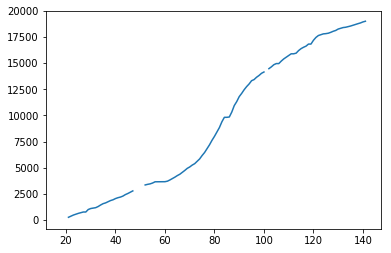

In [203]:
plt.plot(evd_df[evd_df.health_zone=='Beni'].total_vacc.values)

In [26]:
out_wk['Total'] = out_wk[wk_range].sum(axis=1)
temp_df = out_wk.sort_values('Total',ascending=False)[['Total']]
temp_df['risk_index'] = temp_df.Total/temp_df.Total.sum()
temp_df.head(10)

,Total,risk_index
0,,
VUHOVI,177,0.280063
MABALAKO,159,0.251582
OICHA,29,0.045886
MUTWANGA,27,0.042722
BENI,25,0.039557
KIBIRIZI,25,0.039557
MUSIENENE,23,0.036392
KALUNGUTA,20,0.031646
MAKISO-KISANGANI,19,0.030063
